In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [78]:
df=pd.read_csv(r'heart_failure_clinical_records_dataset.csv')

In [79]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Age: The age of the patient (numeric).

Anaemia: Indicates the presence of anemia (binary: 0 for no, 1 for yes).

Creatinine Phosphokinase (CPK): Level of creatinine phosphokinase enzyme in the blood (numeric).

Diabetes: Indicates whether the patient has diabetes (binary: 0 for no, 1 for yes).

Ejection Fraction: Percentage of blood leaving the heart at each contraction (numeric).

High Blood Pressure: Indicates whether the patient has high blood pressure (binary: 0 for no, 1 for yes).

Platelets: Platelet count in the blood (numeric).

Serum Creatinine: Level of creatinine in the blood (numeric).

Serum Sodium: Level of sodium in the blood (numeric).

Sex: Gender of the patient (binary: 0 for female, 1 for male).

Smoking: Indicates whether the patient smokes (binary: 0 for no, 1 for yes).

Time: Follow-up period (in days) for the patient's condition (numeric)

In [80]:
df.shape

(299, 13)

In [81]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

1. What is the distribution of age among heart failure patients in the dataset

<AxesSubplot: xlabel='age', ylabel='Count'>

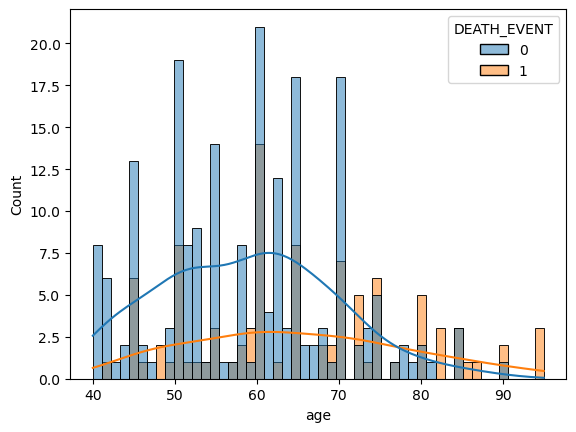

In [82]:
sns.histplot(data=df,x=df['age'],hue=df['DEATH_EVENT'],bins=50,kde=True)

 2 How does the death rate vary with age?

Death rate  is more at 69 and above with some outliers around 48 and 59.

3. What is the percentage of male and female patients in the dataset?

In [116]:
count=df.groupby('sex')['DEATH_EVENT'].count()

In [117]:
count

sex
0    105
1    194
Name: DEATH_EVENT, dtype: int64

In [85]:
sum1=df.shape[0]

In [86]:
sex_percentage_by_death_event=(count/sum1*100)

In [87]:
sex_percentage_by_death_event

sex
0    35.117057
1    64.882943
Name: DEATH_EVENT, dtype: float64

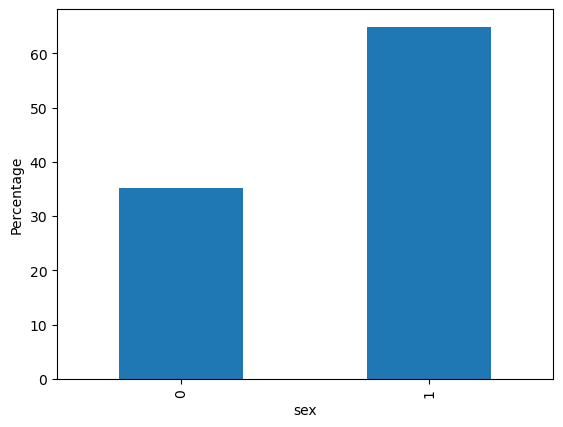

In [88]:
sex_percentage_by_death_event.plot(kind='bar')
plt.ylabel('Percentage')
plt.show()

4.how does th5 platelet count vary among different age groups?

In [89]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

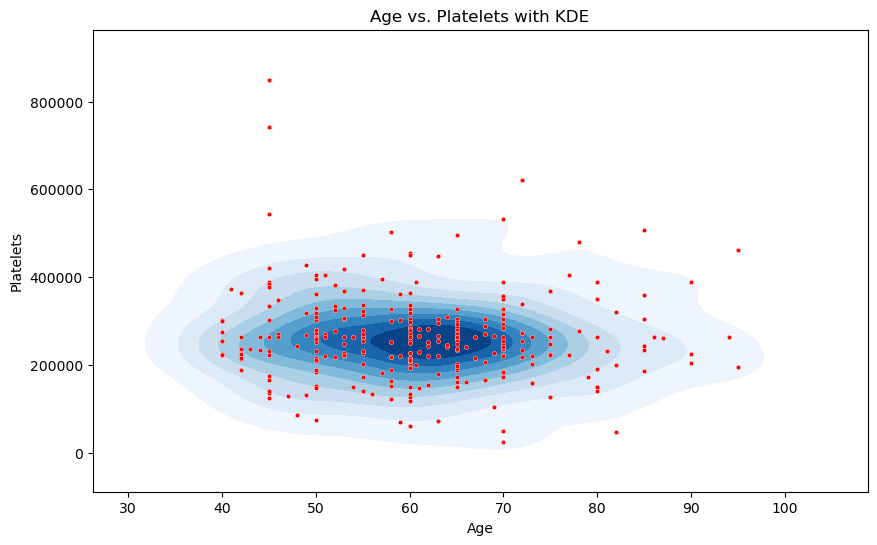

In [90]:
# Create a scatter plot with KDE overlays
plt.figure(figsize=(10, 6))
sns.kdeplot(x='age', y='platelets', data=df, cmap='Blues', fill=True)
sns.scatterplot(x='age', y='platelets', data=df, color='red', s=10)
plt.title('Age vs. Platelets with KDE')
plt.xlabel('Age')
plt.ylabel('Platelets')
plt.show()


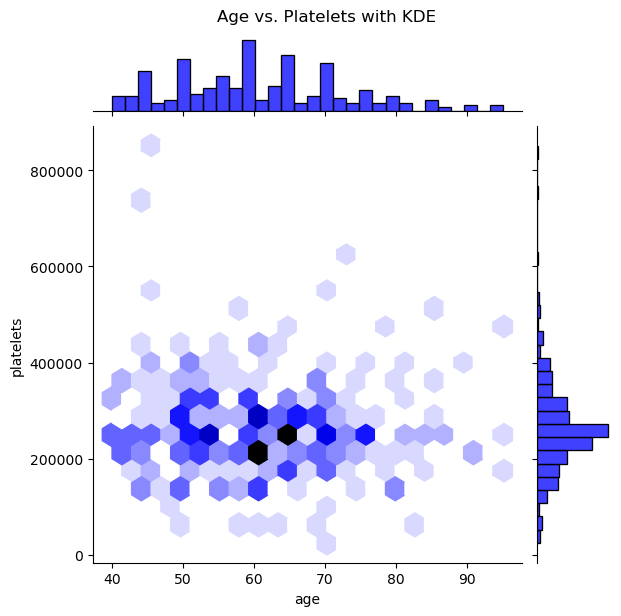

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a hexbin plot with KDE for age and platelets
sns.jointplot(x='age', y='platelets', kind='hex', data=df, color='blue', marginal_kws=dict(bins=30, fill=True))
plt.suptitle('Age vs. Platelets with KDE', y=1.02)
plt.show()


5.Is there a correlation between creatinine and sodium levels in the blood..

<AxesSubplot: >

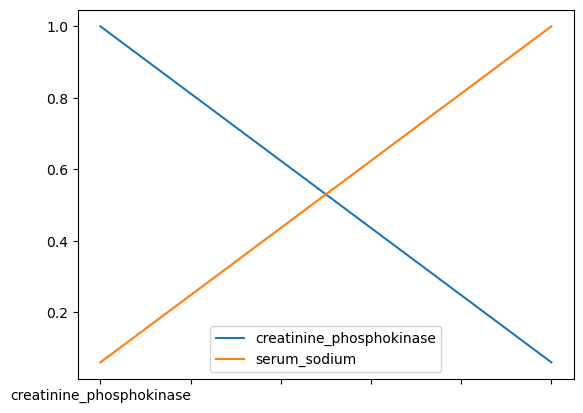

In [92]:
df[['creatinine_phosphokinase','serum_sodium']].corr().plot() #negative correlation

6.How does the prevalence of high blood pressure differ between male and female patients?

In [93]:
high_bp_by_sex=df.groupby('sex')['high_blood_pressure'].mean()*100

In [94]:
high_bp_by_sex

sex
0    41.904762
1    31.443299
Name: high_blood_pressure, dtype: float64

In [95]:
high_bp_by_sex.index = high_bp_by_sex.index.map({0: 'Female', 1: 'Male'})

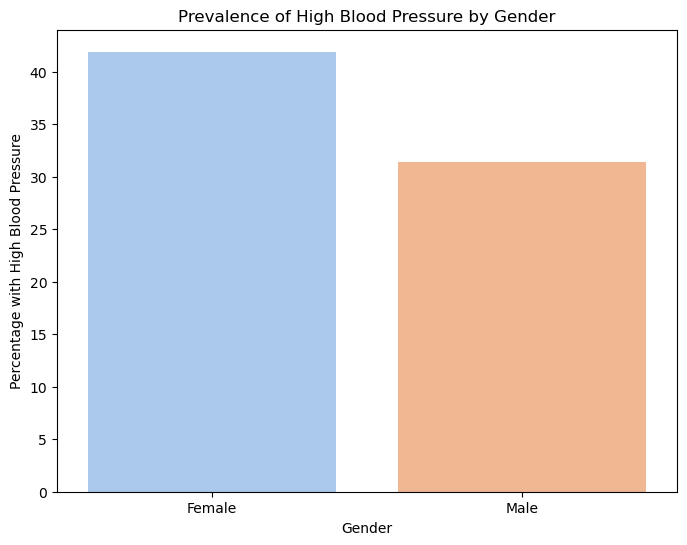

In [96]:


# Bar plot to show the prevalence of high blood pressure by gender
plt.figure(figsize=(8, 6))
sns.barplot(x=high_bp_by_sex.index, y=high_bp_by_sex.values, palette='pastel')
plt.title('Prevalence of High Blood Pressure by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage with High Blood Pressure')
plt.show()


7.What is the relationship between smoking habits and heart failure?

<AxesSubplot: xlabel='smoking', ylabel='DEATH_EVENT'>

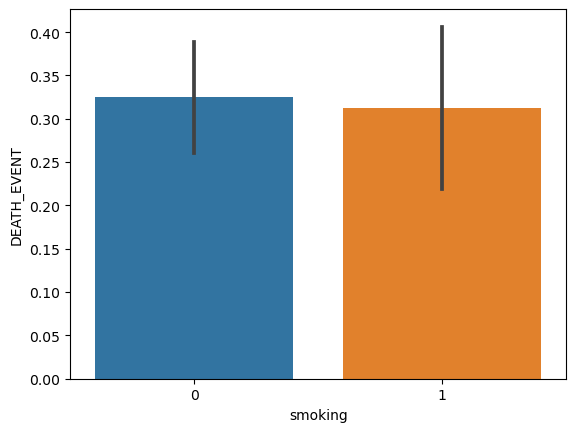

In [101]:
sns.barplot(data=df,x='smoking',y='DEATH_EVENT') #death rate for females is higher those who dont  smoke

8. Are there any noticeable patterns in distribution of death events across different age groups?

<AxesSubplot: xlabel='age', ylabel='Count'>

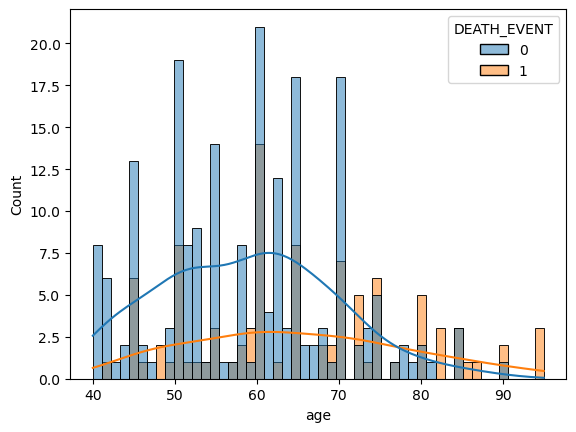

In [104]:
sns.histplot(data=df,x=df['age'],hue='DEATH_EVENT',bins=50,kde=True)

9.Is there any significanct difference in ejection fraction between patients with and without diabetes?

/tmp/ipykernel_131/2217630099.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='diabetes', y='ejection_fraction', data=df, jitter=True, palette="Set2", dodge=True)


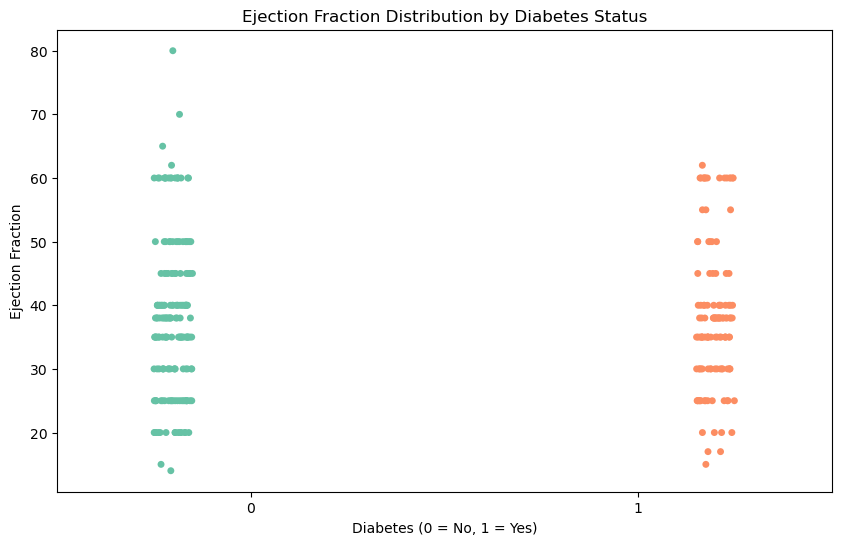

In [111]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='diabetes', y='ejection_fraction', data=df, jitter=True, palette="Set2", dodge=True)
plt.title('Ejection Fraction Distribution by Diabetes Status')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Ejection Fraction')
plt.show()


10.How does the serum creatinine level vary between patients who survived and who do not?

In [131]:
serum_creatinine_by_death=df.groupby('DEATH_EVENT')['serum_creatinine'].mean()

In [132]:
serum_creatinine_by_death

DEATH_EVENT
0    1.184877
1    1.835833
Name: serum_creatinine, dtype: float64

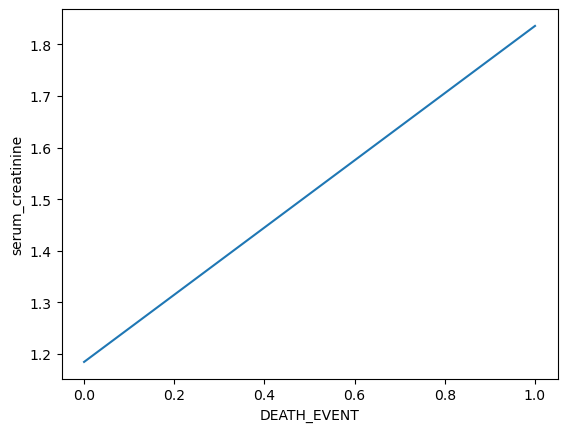

In [133]:
serum_creatinine_by_death.plot() #As the serum creatinine level increases the death rate also increases
plt.ylabel('serum_creatinine')
plt.show()

<AxesSubplot: xlabel='serum_creatinine', ylabel='Count'>

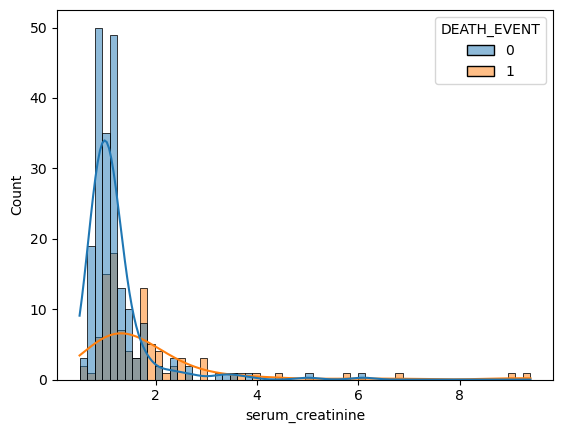

In [124]:
sns.histplot(data=df,x=df['serum_creatinine'],hue='DEATH_EVENT',kde=True)